In [115]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from statsmodels.discrete.discrete_model import Logit
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
%matplotlib inline

In [2]:
data = pd.read_csv("data.csv", encoding="ISO-8859-1")

In [3]:
data.head()

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,No Info,No Info,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0,0,0,0,0,0,0,0,0,0
1,Company2,Success,2011,3,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529412,21.76470588,10.88235294,2.941176471,0,0,0,0,0,8
2,Company3,Success,2011,3,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846153846,17.09401709,9.401709402,0,2.777777778,0,0,0,0,9
3,Company4,Success,2009,5,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0,0,0,0,0,0,0,0,0,5
4,Company5,Success,2010,4,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0,0,0,0,0,0,0,0,0,6


In [4]:
data.isnull().sum()

Company_Name                 0
Dependent-Company Status     0
year of founding             0
Age of company in years     44
Internet Activity Score     65
                            ..
Percent_skill_Law            0
Percent_skill_Consulting     0
Percent_skill_Finance        0
Percent_skill_Investment     0
Renown score                 0
Length: 116, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Columns: 116 entries, Company_Name to Renown score
dtypes: float64(5), int64(3), object(108)
memory usage: 427.9+ KB


In [6]:
data.describe()

,Internet Activity Score,Employee Count,Employees count MoM change,Last Funding Amount,Number of Co-founders,Number of of advisors,Team size Senior leadership,Industry trend in investing
count,407.000000,306.000000,267.000000,3.120000e+02,472.000000,472.000000,472.000000,390.000000
mean,114.159705,31.408497,-1.299625,6.379489e+06,1.868644,1.016949,3.730932,2.889744
std,225.651419,62.673600,23.967085,9.901622e+06,1.143481,2.014736,2.516539,0.845765
min,-725.000000,0.000000,-100.000000,1.000000e+04,0.000000,0.000000,1.000000,0.000000
25%,-3.500000,4.250000,0.000000,7.500000e+05,1.000000,0.000000,2.000000,2.000000
50%,60.000000,13.000000,0.000000,2.800000e+06,2.000000,0.000000,3.000000,3.000000
75%,216.000000,31.000000,6.000000,7.850000e+06,2.250000,1.000000,5.000000,3.000000
max,1535.000000,594.000000,50.000000,7.700000e+07,7.000000,13.000000,24.000000,5.000000


In [7]:
data.columns

Index(['Company_Name', 'Dependent-Company Status', 'year of founding',
       'Age of company in years', 'Internet Activity Score',
       'Short Description of company profile', 'Industry of company',
       'Focus functions of company', 'Investors', 'Employee Count',
       ...
       'Percent_skill_Data Science', 'Percent_skill_Business Strategy',
       'Percent_skill_Product Management', 'Percent_skill_Sales',
       'Percent_skill_Domain', 'Percent_skill_Law', 'Percent_skill_Consulting',
       'Percent_skill_Finance', 'Percent_skill_Investment', 'Renown score'],
      dtype='object', length=116)

In [128]:
# I found so many categorical values which have same names, so I'll create library and replace these strings to integer values
mapping = {'Success' : 1, 'Failed' : 0, 'Medium' : 2, 'Low' : 1, 'High' : 3, 'None' : 0, 'Few': 1, 'Many':2, 'Yes' : 1, 'No' : 0,'No Info': 'NaN'}
data1 = data.replace(mapping)
#print(data1)

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Columns: 116 entries, Company_Name to Renown score
dtypes: float64(5), int64(5), object(106)
memory usage: 427.9+ KB


# Finding correlations between variables, I will drop one of the high correlated variables (70%)


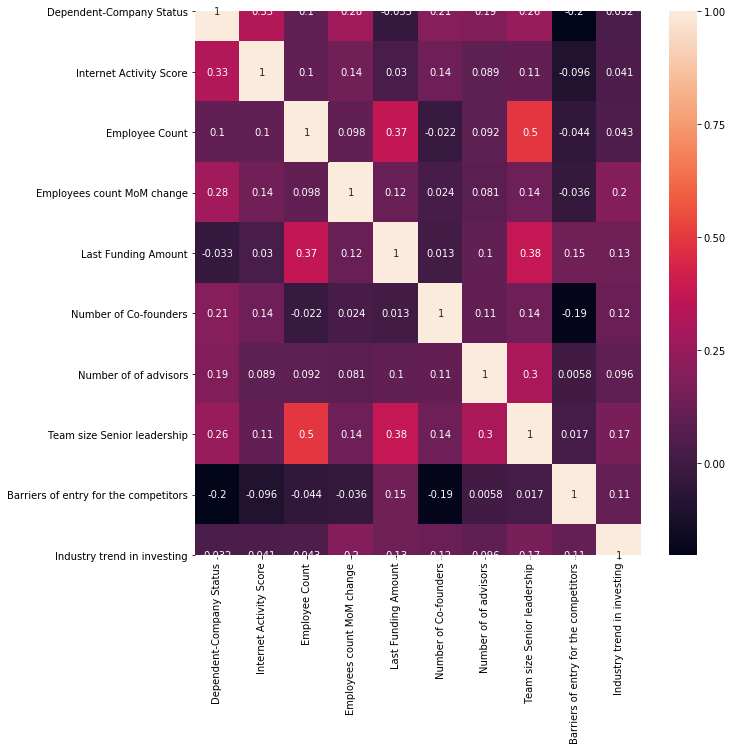

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(data1.corr(), annot = True)
plt.show()

In [11]:
#Dropping highly correlated variables
# Create correlation matrix
corr_matrix = data1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.97
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Drop features 
data1.drop(to_drop,axis=1,inplace=True)

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Columns: 116 entries, Company_Name to Renown score
dtypes: float64(5), int64(5), object(106)
memory usage: 427.9+ KB


In [126]:
#print(data1)

In [127]:
# Because of so many NAN(NO INFO) values in dataset, I will drop these columns
data1.replace('NaN',np.nan)
data1.dropna(axis="columns", how="any",inplace=True)

In [36]:
data1.drop(["Company_Name"],axis=1,inplace=True)

In [37]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Columns: 116 entries, Dependent-Company Status to intercept
dtypes: float64(6), int64(5), object(105)
memory usage: 427.9+ KB


In [39]:
data1.describe()

,Dependent-Company Status,Internet Activity Score,Employee Count,Employees count MoM change,Last Funding Amount,Number of Co-founders,Number of of advisors,Team size Senior leadership,Barriers of entry for the competitors,Industry trend in investing,intercept
count,472.000000,407.000000,306.000000,267.000000,3.120000e+02,472.000000,472.000000,472.000000,472.000000,390.000000,472.0
mean,0.646186,114.159705,31.408497,-1.299625,6.379489e+06,1.868644,1.016949,3.730932,0.533898,2.889744,1.0
std,0.478660,225.651419,62.673600,23.967085,9.901622e+06,1.143481,2.014736,2.516539,0.499379,0.845765,0.0
min,0.000000,-725.000000,0.000000,-100.000000,1.000000e+04,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
25%,0.000000,-3.500000,4.250000,0.000000,7.500000e+05,1.000000,0.000000,2.000000,0.000000,2.000000,1.0
50%,1.000000,60.000000,13.000000,0.000000,2.800000e+06,2.000000,0.000000,3.000000,1.000000,3.000000,1.0
75%,1.000000,216.000000,31.000000,6.000000,7.850000e+06,2.250000,1.000000,5.000000,1.000000,3.000000,1.0
max,1.000000,1535.000000,594.000000,50.000000,7.700000e+07,7.000000,13.000000,24.000000,1.000000,5.000000,1.0


In [40]:
#how many 0s and 1s in original data
np.round(data1['Dependent-Company Status'].value_counts()/len(data)*100,0)

1    65.0
0    35.0
Name: Dependent-Company Status, dtype: float64

# Creating X and Y variables

In [58]:
X = data1.drop('Dependent-Company Status',axis=1)
Y = data1["Dependent-Company Status"]

In [59]:
X = pd.get_dummies(data=X, drop_first=True)

In [61]:
#Splitting the data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)


# Logistic Reg


In [123]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
regr = linear_model.LinearRegression() 
results = regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)
print(predicted)
regr.coef_


[ 1.00992637e+00  4.42477753e-01  7.63497085e-01  8.15211705e-01
  1.39295924e+00  1.03943586e+00  5.65369709e-02  1.01049636e+00
  2.61247418e-01  9.62181677e-02  8.52157304e-01  8.40901134e-01
  9.67404807e-01  1.00000000e+00 -4.22904813e-02  7.09456155e-01
  7.72359825e-01  7.63386539e-01  9.19889218e-01  8.46301994e-01
 -1.12502364e-01  1.08547628e+00  1.59081916e-01  8.99398476e-01
  6.89610618e-01  5.88615257e-01  1.39227381e+00  1.06290252e+00
  1.26710698e+00  9.88408390e-01 -3.50781898e-02  9.63707032e-01
  1.06181881e+00  8.30568370e-01 -1.14907172e-01  8.61404733e-01
  8.84279670e-01  9.94648053e-01  5.13117559e-01  5.12587264e-01
  8.20879275e-01 -3.04198187e-02  1.36041470e+00 -8.88178420e-16
  3.23540461e-01  1.02171994e+00  1.03512779e+00  5.94467641e-01
  3.38312774e-01  8.94362439e-01  8.15100950e-01  2.49474552e-02
 -3.15927815e-01  6.77084654e-01 -7.58572797e-02  3.69468299e-01
  1.22010227e+00 -7.73346647e-02  6.22446600e-01 -8.27616260e-03
  3.56121681e-01  1.90612

array([-0.01130288,  0.00272961,  0.01088555, ..., -0.00470583,
       -0.06604031,  0.00260034])

In [125]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test,predicted)
cnf_matrix

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [121]:
#odds ratio for statistically significant variables at 5% sig level
np.exp(predicted.params[predicted.pvalues<0.05]).round(2)

AttributeError: 'numpy.ndarray' object has no attribute 'params'


# Decision_Tree


In [82]:
#Decision_Trees
Tree = DecisionTreeClassifier(max_depth=2,min_samples_leaf=89,class_weight="balanced",random_state=0)
Tree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=89, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [83]:
#let's get feature importances
from sklearn.tree import DecisionTreeClassifier
feat_imp=pd.DataFrame(Tree.feature_importances_,index=X.columns,
                      columns=["Feature_imp"])
feat_imp=feat_imp.sort_values(by="Feature_imp",ascending=False)
feat_imp

,Feature_imp
Invested through global incubation competitions?_NaN,0.840682
Big Data Business_1,0.159318
Number of Co-founders,0.000000
Percent_skill_Engineering_23.07692308,0.000000
Percent_skill_Engineering_20.58823529,0.000000
...,...
google page rank of company website_5092265,0.000000
google page rank of company website_504890,0.000000
google page rank of company website_4996181,0.000000
google page rank of company website_4910627,0.000000


In [84]:
#Support Vector Machines
from sklearn.svm import SVC
SVC = SVC(C=0.1,class_weight="balanced",random_state=0)
SVC.fit(X_train, Y_train)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.1, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [92]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score, roc_auc_score, roc_curve, accuracy_score,precision_score,f1_score,confusion_matrix
model={"Decision tree":Tree,"SVM":SVC}
scores={"Recall": recall_score,"Accuracy":accuracy_score,"Precision":precision_score,
        "F1_Score":f1_score}
for score_names,scores in scores.items():
    print("\n",score_names)
    for model_names, models in model.items():
        print(model_names,scores(Y_train,models.predict(X_train)).round(2)*100)


 Recall
Decision tree 95.0
SVM 100.0

 Accuracy
Decision tree 86.0
SVM 64.0

 Precision
Decision tree 85.0
SVM 64.0

 F1_Score
Decision tree 89.0
SVM 78.0
